# Intro

## Tạo phân phối phổ biến trong R 

Ví dụ với phân phối nhị thức ta có: 
Các lệnh này liên quan đến phân phối nhị thức (binomial distribution) trong R:

1. `dbinom(x, size, prob, log = FALSE)`: Đây là hàm để tính toán hàm mật độ xác suất (probability density function - PDF) của phân phối nhị thức tại giá trị x. Cụ thể, nó tính xác suất của có x thành công trong n lần thử, với xác suất thành công là prob và tổng số thử n là size. Tham số log cho phép tính logarit tự nhiên của xác suất nếu được đặt là TRUE.

2. `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Đây là hàm tính toán hàm phân phối tích lũy (cumulative distribution function - CDF) của phân phối nhị thức tại giá trị q. Nó cho biết xác suất có ít nhất q thành công trong n lần thử. Tham số lower.tail cho phép bạn chọn xem bạn muốn tính toán xác suất cho đuôi dưới (TRUE) hoặc đuôi trên (FALSE) của phân phối. Tham số log.p cho phép tính logarit tự nhiên của xác suất nếu được đặt là TRUE.

3. `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Đây là hàm để tính toán ngược lại, tức là tính giá trị q cho một xác suất tích lũy p cho phân phối nhị thức. Nó cho biết số lần thử q mà xác suất có ít nhất q thành công là p. Tham số lower.tail và log.p tương tự như trong pbinom.

4. `rbinom(n, size, prob)`: Đây là hàm để tạo ra mẫu ngẫu nhiên từ phân phối nhị thức. Nó sinh ra n giá trị ngẫu nhiên, mỗi giá trị biểu diễn số lần thành công trong n lần thử, với xác suất thành công là prob và tổng số thử n là size.

In [ ]:
dbinom(x, size, prob, log = FALSE)
pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)
qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)
rbinom(n, size, prob)

![images](/mnt/DataK/Project/StatisticalComputing/images/240416_02h17m04s_screenshot.png)

# The Inverse Transform Method (Phương pháp biến đổi nghịch đảo)

**Lý thuyết 1**: (Probability Integral Transformation - Xác suất tích phân chuyển đổi).  
Nếu X là **biến ngẫu nhiên liên tục** với cdf $F_{X}(x)$ thì $U = F_{X}(x) \sim Uniform(0, 1)$

Như vậy giờ áp dụng phép biến đổi tích phân xác suất tìm 1 hàm ngược $F_{X}^{-1}(u) = inf${$x: F_{X}(x) = u$} với $u \in (0, 1)$  
Ký hiệu ⁡inf biểu thị giá trị nhỏ nhất trong tập hợp các giá trị của biến X mà khi áp dụng hàm phân phối tích lũy $F_{X}​(x)$, ta thu được giá trị u. Tức là $F_{X}^{−1}(u)$ là giá trị nhỏ nhất của biến $X$ sao cho xác suất tích lũy đạt đến $u$.

Tổng kết lại thuật toán để tạo 1 quan sát ngẫu nhiên $X$:  

1. **Tính toán hàm ngược (inverse function) $F_X^{-1}(u)$**: Trước tiên, cần tính toán hàm ngược của hàm phân phối tích lũy $F_X(x)$. Điều này là cần thiết để chúng ta có thể tìm giá trị của biến ngẫu nhiên $X$ dựa trên một biến ngẫu nhiên có phân phối đều trong khoảng từ 0 đến 1, thường được ký hiệu là $u \sim Uniform(0,1)$.

2. **Viết lệnh hoặc hàm tính toán $F_X^{-1}(u)$**: Sau khi có hàm ngược $F_X^{-1}(u)$, cần viết một lệnh hoặc hàm trong môi trường lập trình để tính toán giá trị của $F_X^{-1}(u)$ dựa trên giá trị của $u$.

3. **Đối với mỗi biến ngẫu nhiên cần sinh ra**:
   - (a) **Tạo một biến ngẫu nhiên $u$ từ phân phối đồng nhất Uniform(0,1)**: Sử dụng một phương pháp sinh số ngẫu nhiên, chúng ta tạo ra một giá trị $u$ nằm trong khoảng từ 0 đến 1 theo phân phối đồng nhất.
   - (b) **Tính toán giá trị $x$ của biến ngẫu nhiên $X$ dựa trên $u$ sử dụng hàm ngược**: Sử dụng giá trị $u$ được tạo ra từ bước trước và áp dụng nó vào hàm ngược $F_X^{-1}(u)$ để tính toán giá trị tương ứng của biến ngẫu nhiên $X$.

Các bước này cho phép chúng ta sinh ra các quan sát ngẫu nhiên của biến $X$ dựa trên phân phối xác suất của nó, sử dụng một biến ngẫu nhiên có phân phối đồng nhất. Phương pháp này có thể được áp dụng cho cả biến ngẫu nhiên liên tục và rời rạc.

## Sử dụng phương pháp Inverse Transform với trường hợp biến liên tục 

### Ví dụ 3.2  
Ta có $f_X(x) = 3x^2$ với $x \in (0, 1)$  
$\rightarrow F_X(x) = x^3$ với $x \in (0, 1)$  
$\rightarrow u = F_X(x) = x^3$ với $x \in (0, 1)$  
$\rightarrow$ Tìm được hàm ngược $ F_X^{-1}(u) = x = u^{1/3}$

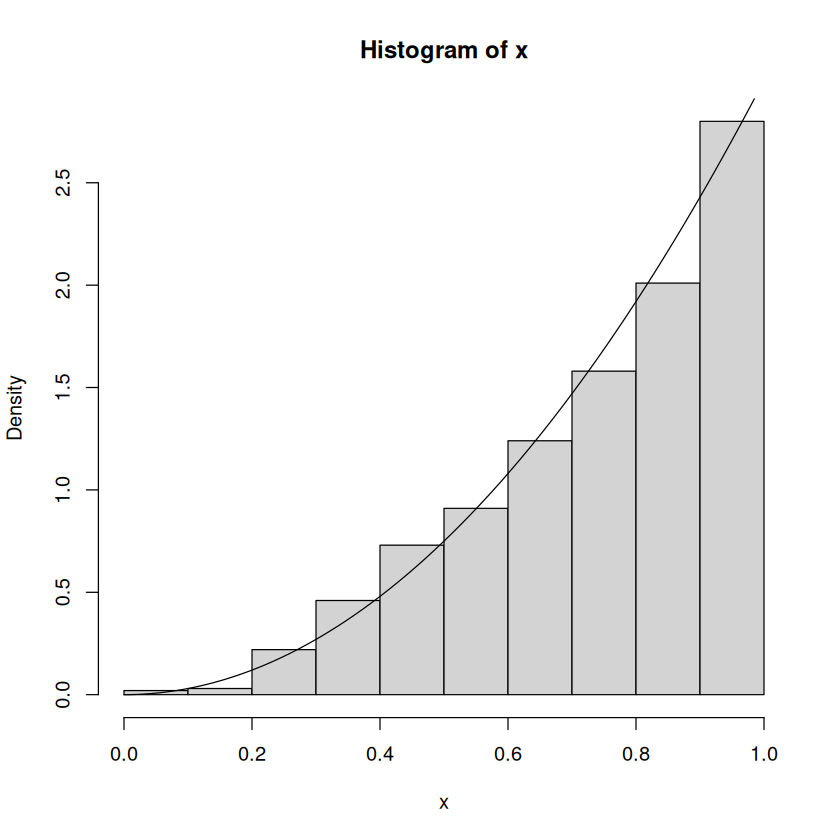

In [2]:
n <- 1000   
u <- runif(n, 0, 1)   # tạo 1000 giá trị u theo phân phối đều  trong (0, 1)
x <- u^(1/3)          # khởi tạo giá trị x theo hàm ngược đã tính ở trên
hist(x, prob = TRUE)  # density histogram of sample
y <- seq(0, 1, .01)   # chia 0, 1 thành các khoảng 0.01
lines(y, 3*y^2) # density curve f(x) cdf

### Ví dụ 3.3  
$X$ có phân phối tương tự với phân phối mũ với $mean = 1 / \lambda$  
$\rightarrow f(x, \lambda) = \lambda * e^{- \lambda * x}$ với $x > 0$
$\rightarrow F_{X}(x) = 1 - e^{- \lambda x} = u$ với $x > 0$ 
$\rightarrow x = ln(1 - u) * \frac{-1}{\lambda} = F_{X}^{-1}(u)$  
  
Vì $(1 - u) \sim u$ có phân phối như nhau nên đơn giản là để $F_X^{-1}(u) = ln(u) * \frac{-1}{\lambda}$

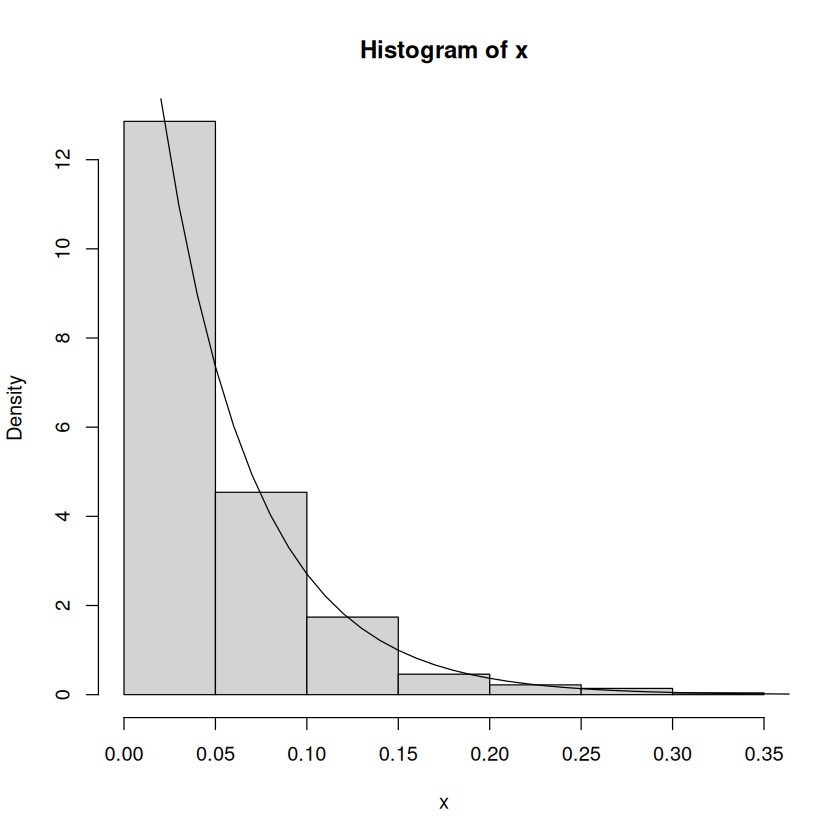

In [5]:
gen_data_exp <- function(lambda = 10) {
    n <- 1000
    u <- runif(n, 0, 1)
    x <- -1 / lambda * log(u)
    return(x)
}

lambda = 20
x <- gen_data_exp(lambda)
hist(x, prob = TRUE)
y = seq(0, 1, 0.01)
lines(y, lambda * exp(-lambda * y))

## Sử dụng phương pháp Inverse Transform với trường hợp biến rời rạc

Phương pháp biến đổi nghịch đảo cũng có thể áp dụng cho các phân phối rời rạc.
Nếu X là một biến ngẫu nhiên rời rạc và
$ ... < x_{i−1} < x_i < x_{i+1} < ... $
là các điểm không liên tục của $F_X(x)$, thì biến đổi nghịch đảo được xác định như sau:  
$F_X^{-1}(u) = xi$, trong đó $F_X(x_{i−1}) < u \leq F_X(x_i)$.  
Đối với mỗi biến ngẫu nhiên cần:
1. Tạo ra một số ngẫu nhiên $u$ từ Uniform(0,1) - phân phối chuẩn runif().
2. Trả về $x_i$ khi $F(x_{i−1}) < u \leq F(x_i)$. Việc giải phương trình $F (x_{i−1} ) < u \leq F (x_i )$ trong Bước (2) có thể khó khăn đối với một số phân phối. Xem Devroye [72, Chương III] để biết một số phương pháp khác nhau để thực hiện phương pháp biến đổi nghịch đảo trong trường hợp rời rạc. 

Thuật toán này sử dụng phân phối tích lũy (cumulative distribution function - CDF) để tạo ra các biến ngẫu nhiên có phân phối nhất định. Bước đầu tiên là tạo ra một số ngẫu nhiên $u$ từ phân phối đều (Uniform distribution) trong khoảng từ 0 đến 1. Sau đó, ta sử dụng giá trị $u$ này để tìm ra giá trị của biến ngẫu nhiên rời rạc tương ứng $x_i$ bằng cách tìm ra khoảng mà $u$ nằm trong phân phối tích lũy của biến ngẫu nhiên rời rạc và chọn giá trị $x_i$ tương ứng.  
  
Lý do có tính chất điều kiện ở bước 2 là vì hàm CDF là hàm luôn tăng.

### Ví dụ 3.4  
(Phân phối 2 điểm)  
Sử dụng hàm nghịch từ phân phối Bernoulli(p = 0.4).  

Ta có: $F_X (0) = f_X (0) = 1 − p$ và $F_X (1) = 1$. ? tại sao $F_X = f_X$  
Vì, $F_X^{-1}(u) = 1$ nếu $u > 0.6$ và $F_X (u) = 0$ nếu $u \leq 0.6$.  
Vậy trình tạo sẽ dựa trên biểu thức với u > 0.6

In [7]:
n <- 1000
p <- 0.4
u <- runif(n)
x <- as.integer(u > 0.6) # (u > 0.6) is a logical vector, u <= 0.6 thì F = 0
x
mean(x)
var(x)

[1] 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0
  [38] 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0
  [75] 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0
 [112] 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0
 [149] 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0
 [186] 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 [223] 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 [260] 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 [297] 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 [334] 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 [371] 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1
 [408] 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 [445] 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 [519] 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 [556] 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0
 [593] 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 [630] 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 [667] 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 [704] 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 [741] 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 [778] 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 [815] 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0
 [852] 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 [889] 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 [926] 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 [963] 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1
[1000] 0

[1] 0.415

[1] 0.243018

In [8]:
# Cách 2: Dùng hàm có sẵn
rbinom(n, size = 1, prob = p)
# Cách 3:
sample(c(0,1), size = n, replace = TRUE, prob = c(.6,.4))

[1] 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0
  [38] 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
  [75] 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 [112] 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1
 [149] 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 [186] 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0
 [223] 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1
 [260] 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 [297] 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 [334] 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1
 [371] 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 [408] 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 [445] 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 [482] 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0
 [519] 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1
 [556] 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 [593] 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1
 [630] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 [667] 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0
 [704] 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1
 [741] 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 [778] 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 [815] 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 [852] 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 [889] 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0
 [926] 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 [963] 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1
[1000] 1

[1] 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
  [38] 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1
  [75] 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 [112] 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 [149] 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 [186] 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 [223] 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 [260] 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 [297] 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0
 [334] 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1
 [371] 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 [408] 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 [445] 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 [482] 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0
 [519] 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 [556] 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 [593] 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 [630] 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 [667] 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 [704] 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 [778] 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 [815] 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0
 [852] 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 [889] 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 [926] 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 [963] 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1
[1000] 0

### Ví dụ 3.5  
a. 
(Phân phối Geometric với tham số p = 0.4)  

Ta có:  
$f(x) = pq^x$ với $x = 0, 1, 2, ...$ và $p = 1 - q$  
$\rightarrow$ Tại mỗi điểm $x = 0, 1, 2, ...$ thì có $F(x) = 1 - q^{x + 1}$

Với mỗi mẫu $x$ ta cần tạo 1 phân phối đều $u$ và giải: $1 - q^x < u \leq 1 - q^{x + 1}$  
$\rightarrow x < \frac{log(1 - u)}{log(q)} \leq x + 1$  
$\rightarrow x + 1 = \lceil \frac{log(1 - u)}{log(q)} \rceil$

In [10]:
n <- 1000
p <- 0.25
u <- runif(n)
k <- ceiling(log(1-u) / log(1-p)) - 1
# k <- floor(log(u) / log(1-p)) # cách đơn giản đi vì u và 1 - u đều theo cùng 1 phân phối đều
k

[1]  0  3  1  0  4  7  1  3  1  9  3  0  7  1  2  1  0  3  1  1  3  0  1  1
  [25]  2  0  0  0  0  2  1  0  1  5  3  2  0  4  0  6  0  0  0  4  7  2  4  0
  [49]  1  6  0 11  5  3  2 13 12  4  3  2  0  2  1  1  1  9  2  1  7 14  7  0
  [73]  0  3  3  7  0  6  8  0  0  2  4  7  2  5  0  4  4  1  0  0  3  2  3  2
  [97]  1  5  4  3  5  7 14  3  0  1  2  8  4  1  9  0  3  1  2  4  9  0  5  0
 [121]  0  3  0  5  4 16  0  5  2  1  1  1  3  0  2  9  5  0  0  5  0  0  1  1
 [145] 17  9  3  0  6  0  0  2  0  0  1  1  5  4  4  8 14  2  2 11  0  8  2  6
 [169]  8  0  0  5  0  3  1 10  0  3  1  4  0  9  2  3  1  3  2  3  3  0  2  2
 [193]  0  1  0  4  0  2  0  3  4  5  2  0  5  6  7 12  1  3  1  3  0  0  0  3
 [217] 13  1  1  2  0  0  1  3  3  4  1  6  2  5  3  1  1  6  2  0  0  2  2  1
 [241]  4  3  7  1  1  6  1  8  6  1  0  1  6  5 14  0  4  3  1  0  1  0  5  0
 [265]  3  8  2  0  1  3  3 10  7  3  0  5  5  3  0  6  7  3  5  0  0  4  3  1
 [289]  9 14  7  1  3 17  0  7  2  0  3  1  0  0  0  3  0  4  1  6  3  0  0  1
 [313]  0  0  2  0  8  9  8  8  2 10  0  2  6  2  1  2  1  2  2  1  5  0  2  0
 [337]  3  2  0  2  3  4  0  0  0 10  5  6  2  3  5  8  7  0  0  4  1  0  1 12
 [361]  5  1  1  2  0  3  0  1  1 11  1  2  4  4  0  6  1  3  0  0  7 14  8  1
 [385]  7 13  0  3 10 10  0  0  2  1  8  5  4  3  0  0  3  0  8  5  6  1  3  2
 [409]  5 10  4  0  9  0 16  7  4  8  2  0  0  0  0  2  2  1  1  4  1 10  9  2
 [433]  6  0  1  0  1  2  0  9  3  3  4  1  5  0  4  3  3  0  3  6  2  1  7  1
 [457]  0  0  0  3  4  5  1  1  3  0  3  0  0  1  8  0 19  3  4  7  6  1  3  0
 [481]  1  0  0  1  0  9 13  4  0  2  0  4  0 11  1  3  0  5  2 14  0  0  1  2
 [505]  5  0  0  1  3  3  5  4  5  0  1  5  0  6  1  2  0  1  6  4  0  0  3  0
 [529]  0  0  0  0  1  0  1  1  0  2  1  2  6  3  3  0  0  1  0  2  2  0  2  0
 [553]  2  3  4  1  3  1  2  2  3  1  0  0  0  5  3  6  3  1  9  3  7  0  6 12
 [577]  4  2  2  8  3  0  3  3  3  2  0  1  1  2  0  4  1  0  5  0  0  3  4  5
 [601] 12  0  4  0  2  0  0  6  0  1  3  1  0  2  1 22  0  3 14  5  1  4  0  2
 [625]  1  1  7  0  4  6  2  0  2  4  8  2  0  0  2  1  2  1  0  3  5  0  4  2
 [649]  0  2  2  4  4  5  1  4  2  0  7  3  4  0  0  3  0  2  3  3  6  6  4  1
 [673]  2  6  5  3  4 12  0  1  4  3  2  5  1  3  5  3  1  7  0  0 10  5 13  1
 [697] 11  2  4  2  9  1  0 12  0  8  0 10  1  0  2  8  9  3 10  2  6  0  3  3
 [721]  4  5  1  0  4  3  0  5  0  5  6  3  2  2 16  2  2  0  0  0  1  0  1  3
 [745]  6  0  0  0 25  1  9  0  3  0  1  5  3  0  0  0  1  5  1  1  5  0  3 12
 [769]  0  0  6  1  1  0  1  7 11  3  5  1  9  1  7  5  1  0  0  4  0  5  4  3
 [793]  9  1  1  7  0  1  1  1 12  4  3  6  0  1  0  8  0  1  3 12  5  3  2  1
 [817]  6  2  0 14  3  1  3 12  3  5  2  2  4  2  0  1  1  0  0  6  0  0  1  0
 [841]  2  3  2  4  5  1  6  1  3  1  3  0  3  4  1  2  4  1  0  1  0  4  1  2
 [865]  2  2  9 10  0  2  1  3  1  0  1  3  1  1  8  0  2  2  0  2  8  0  3  3
 [889]  4  4 10 10  1  0  1  6 11  3  0  1  0  4  1 10  2  7  0  0  2 13  2  0
 [913]  1  3  4  5  7  4  5  0  0  0  2  6  1  0  0  0  3  1  3  0  6  2  1  3
 [937]  8  0  1  8  5  0  2  5  3  1  0  2  3  2  1  2 10  1  2  0  5  2  1  1
 [961]  7  7  6 12 10  2  1 10  0  0  0  1  0  0  1 11  0  4  6  0  2  0  1  0
 [985]  0  6  4  0  1  4  3  0  2  2  0  1  0  3  3  4

b.  
(Phân phối Poison)  
Có thể dùng rpois()

Ta có: $f(x + 1) = \frac{\lambda f(x)}{x + 1}$  
$\rightarrow F(x + 1) = F(x) + f(x + 1)$  
Với mỗi một yêu cầu tạo phân phối Poison thì tạo $u$ theo phân phối đều Uniform rồi giải $F (x − 1) < u \leq F (x)$

In [15]:
# Function to generate random variable following Poisson distribution
generate_poisson <- function(lambda, n) {
  # Empty vector to store generated random variables
  poissons <- numeric(n)
  
  # Generate random variables
  for (i in 1:n) {
    u <- runif(1)  # Generate random number from Uniform(0,1)
    x <- 0         # Initialize x
    
    # Find x such that F(x-1) < u <= F(x)
    while (cumsum(dpois(x, lambda)) < u) {  # tính tổng các xác suất từ 0 đến x và so sánh với giá trị u
      x <- x + 1
    }
    
    poissons[i] <- x  # Store generated random variable
  }
  
  return(poissons)
}

# Example usage
lambda <- 2  # Poisson parameter
n <- 2    # Number of random variables to generate
poisson_variables <- generate_poisson(lambda, n)
poisson_variables

In [18]:
rpois(2, 2)

[1] 2 1

In [16]:
?cumsum

cumsum                  package:base                   R Documentation

_C_u_m_u_l_a_t_i_v_e _S_u_m_s, _P_r_o_d_u_c_t_s, _a_n_d _E_x_t_r_e_m_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Returns a vector whose elements are the cumulative sums, products,
     minima or maxima of the elements of the argument.

_U_s_a_g_e:

     cumsum(x)
     cumprod(x)
     cummax(x)
     cummin(x)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric or complex (not ‘cummin’ or ‘cummax’) object, or an
          object that can be coerced to one of these.

_D_e_t_a_i_l_s:

     These are generic functions: methods can be defined for them
     individually or via the ‘Math’ group generic.

_V_a_l_u_e:

     A vector of the same length and type as ‘x’ (after coercion),
     except that ‘cumprod’ returns a numeric vector for integer input
     (for consistency with ‘*’).  Names are preserved.

     An ‘NA’ value in ‘x’ causes the corresponding and followi

In [17]:
?dpois

Poisson                 package:stats                  R Documentation

_T_h_e _P_o_i_s_s_o_n _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function and random
     generation for the Poisson distribution with parameter ‘lambda’.

_U_s_a_g_e:

     dpois(x, lambda, log = FALSE)
     ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)
     qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)
     rpois(n, lambda)
     
_A_r_g_u_m_e_n_t_s:

       x: vector of (non-negative integer) quantiles.

       q: vector of quantiles.

       p: vector of probabilities.

       n: number of random values to return.

  lambda: vector of (non-negative) means.

log, log.p: logical; if TRUE, probabilities p are given as log(p).

lower.tail: logical; if TRUE (default), probabilities are P[X <= x],
          otherwise, P[X > x].

_D_e_t_a_i_l_s:

     The Poisson distribution has density

              

### Ví dụ 3.6  
(Phân phối Logarithm)

In [22]:
rlogarithmic <- function(n, theta) {
    # returns a random logarithmic(theta) sample size n
    u <- runif(n)
    # set the initial length of cdf vector
    N <- ceiling(-16 / log10(theta))
    k <- 1:N
    a <- -1 / log(1 - theta)
    fk <- exp(log(a) + k * log(theta) - log(k))
    Fk <- cumsum(fk)
    x <- integer(n)
    for (i in 1:n) {
        x[i] <- as.integer(sum(u[i] > Fk)) # F^{-1}(u)-1
        while (x[i] == N) {
            # if x==N we need to extend the cdf
            # very unlikely because N is large
            logf <- log(a) + (N + 1) * log(theta) - log(N + 1)
            fk <- c(fk, exp(logf))
            Fk <- c(Fk, Fk[N] + fk[N + 1])
            N <- N + 1
            x[i] <- as.integer(sum(u[i] > Fk))
        }
    }
    x + 1
}

n <- 1000
theta <- 0.5
x <- rlogarithmic(n, theta)
#compute density of logarithmic(theta) for comparison
k <- sort(unique(x))
p <- -1 / log(1 - theta) * theta^k / k
se <- sqrt(p*(1-p)/n)
# standard error
k
p
se
x[1:10]

[1] 1 2 3 4 5 6 7

[1] 0.721347520 0.180336880 0.060112293 0.022542110 0.009016844 0.003757018
[7] 0.001610151

[1] 0.014177633 0.012157939 0.007516569 0.004694035 0.002989237 0.001934658
[7] 0.001267895

[1] 1 1 2 1 1 1 3 1 2 1

# The Acceptance-Rejection Method

Phương pháp Chấp nhận-Từ chối
1. Tìm biến ngẫu nhiên Y với mật độ g thoả mãn $\frac{f(t)}{g(t)} \leq  c$, cho mọi t sao cho f(t) > 0. Đã có sẵn một phương pháp để tạo ra Y ngẫu nhiên.
2. Đối với mỗi biến ngẫu nhiên cần:
   (a) Tạo ra một số ngẫu nhiên y từ phân phối có mật độ g.
   (b) Tạo ra một số ngẫu nhiên u từ phân phối Đồng đều(0, 1).
   (c) Nếu $u < \frac{f(y)}{c * g(y)}$, chấp nhận y và giao x = y; nếu không từ chối y và lặp lại từ Bước 2a.
Lưu ý rằng ở Bước 2c, P (chấp nhận|Y) = P(U < f(Y)/(c * g(Y))).
- Trường hợp rời rạc, đối với mỗi k sao cho f(k) > 0, P (k|được chấp nhận) = f(k) / c.
- Trường hợp liên tục tương tự.

## Ví dụ 3.7  
(Phân phối Beta)

Giả sử Beta(2,. 2) có hàm mật độ là $f(x) = 6x(x - 1)$  
Chọn $g(x)$ theo phân phối chuẩn nên $g(x) = 1$  
$\rightarrow c = \frac{f(x)}{g(x)} = 6$  
$\rightarrow \frac{f(x)}{c * g(x)} = x(x - 1) > u$


In [24]:
n <- 1000
k <- 0
# counter for accepted
j <- 0
# iterations
y <- numeric(n)
while (k < n) {
    u <- runif(1)
    j <- j + 1
    x <- runif(1) # random variate from g
    if (x * (1 - x) > u) {
        # we accept x
        k <- k + 1
        y[k] <- x
    }
}

j
y[1:10]

[1] 5683

[1] 0.1924782 0.3243526 0.5952999 0.4941575 0.6939088 0.3277165 0.5541206
 [8] 0.3822949 0.3742439 0.4410525

# Transformation Methods  
Mẫu $X$ cần tạo có phân phối là 1 hàm các gía trị $u, v$ với $u, v$ lần lượt theo phân phối $U, V$

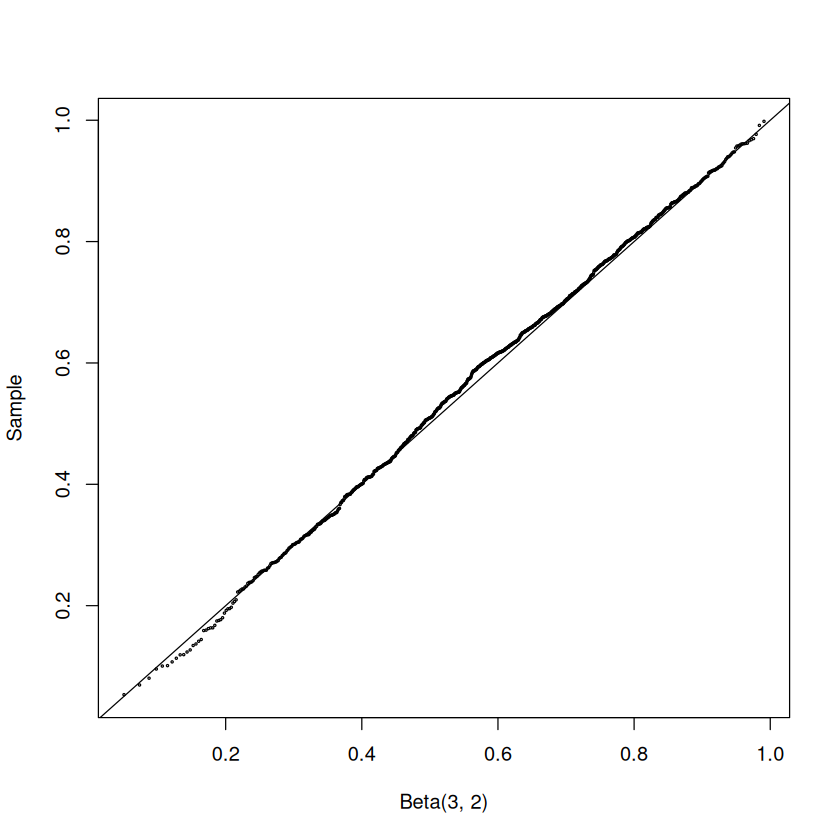

In [1]:
n <- 1000
a <- 3
b <- 2
u <- rgamma(n, shape=a, rate=1)
v <- rgamma(n, shape=b, rate=1)
x <- u / (u + v)

q <- qbeta(ppoints(n), a, b)
qqplot(q, x, cex=0.25, xlab="Beta(3, 2)", ylab="Sample")
abline(0, 1)

# Sum & Mixtures 